LOADING LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

Loading the dataset

In [2]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [3]:
sample_size = int(len(phish_data) * 0.1)  # Sample 20% of the dataset
# Randomly sample the dataset
sampled_data = phish_data.sample(n=sample_size)

In [4]:
sampled_data.shape
phish_data=sampled_data



In [5]:
phish_data.shape


(54934, 2)

In [6]:
phish_data.head()

,URL,Label
394243,museumstuff.com/family-history/names/Cadena.php,good
455884,urbandictionary.com/define.php?term=ROI,good
148515,beemp3.com/index.php?q=beyonce+single+ladies+p...,good
40070,ouled-kenitra.com/webscr.php,bad
316626,dormie2.com/bishop/genealogy/GEDCOM/D0002/G000...,good


LABEL Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder on the "Label" column
encoder.fit(phish_data['Label'])

# Transform the "Label" column to its encoded representation
phish_data['Label'] = encoder.transform(phish_data['Label'])


In [8]:
phish_data.head

<bound method NDFrame.head of                                                       URL  Label
394243    museumstuff.com/family-history/names/Cadena.php      1
455884            urbandictionary.com/define.php?term=ROI      1
148515  beemp3.com/index.php?q=beyonce+single+ladies+p...      1
40070                        ouled-kenitra.com/webscr.php      0
316626  dormie2.com/bishop/genealogy/GEDCOM/D0002/G000...      1
...                                                   ...    ...
544572                           datasnood.com/upqgz5hsxc      0
522584                           176.106.122.31/muk22.png      0
2177    u298261.sendgrid.org/wf/click?upn=1DvF8kENxeKn...      0
420674  realestatevine.ca/property/119874-rue-rancourt...      1
398166  mysanantonio.com/sports/college_sports/big_12/...      1

[54934 rows x 2 columns]>

In [9]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54934 entries, 367834 to 20691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     54934 non-null  object
 1   Label   54934 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 1.0+ MB


In [10]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

Preprocessing


In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [10]:
print('Getting words tokenized ...')
phish_data['text_tokenized'] = phish_data.URL.map(lambda f: tokenizer.tokenize(f)) # doing with all rows


Getting words tokenized ...


In [11]:
phish_data.head()

,URL,Label,text_tokenized
394243,museumstuff.com/family-history/names/Cadena.php,1,"[museumstuff, com, family, history, names, Cad..."
455884,urbandictionary.com/define.php?term=ROI,1,"[urbandictionary, com, define, php, term, ROI]"
148515,beemp3.com/index.php?q=beyonce+single+ladies+p...,1,"[beemp, com, index, php, q, beyonce, single, l..."
40070,ouled-kenitra.com/webscr.php,0,"[ouled, kenitra, com, webscr, php]"
316626,dormie2.com/bishop/genealogy/GEDCOM/D0002/G000...,1,"[dormie, com, bishop, genealogy, GEDCOM, D, G,..."


Stemming

In [12]:
stemmer = SnowballStemmer("english") # choose a language

In [13]:
print('Getting words stemmed ...')
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

Getting words stemmed ...


In [16]:
phish_data.head()

,URL,Label,text_tokenized,text_stemmed
367834,kcmo.org/CKCMO/Depts/ParksandRecreation/SwopeP...,1,"[kcmo, org, CKCMO, Depts, ParksandRecreation, ...","[kcmo, org, ckcmo, dept, parksandrecr, swopepa..."
303631,chevy100days.com/rules.html,1,"[chevy, days, com, rules, html]","[chevi, day, com, rule, html]"
287967,baseball-almanac.com/players/player.php?p=nich...,1,"[baseball, almanac, com, players, player, php,...","[basebal, almanac, com, player, player, php, p..."
310408,crecdn.com/en/home,1,"[crecdn, com, en, home]","[crecdn, com, en, home]"
366319,josephoranholtz.com/names/johnamesindex.php,1,"[josephoranholtz, com, names, johnamesindex, php]","[josephoranholtz, com, name, johnamesindex, php]"


In [14]:
print('Getting joiningwords ...')
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))

Getting joiningwords ...


In [18]:
phish_data.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
367834,kcmo.org/CKCMO/Depts/ParksandRecreation/SwopeP...,1,"[kcmo, org, CKCMO, Depts, ParksandRecreation, ...","[kcmo, org, ckcmo, dept, parksandrecr, swopepa...",kcmo org ckcmo dept parksandrecr swopepark ind...
303631,chevy100days.com/rules.html,1,"[chevy, days, com, rules, html]","[chevi, day, com, rule, html]",chevi day com rule html
287967,baseball-almanac.com/players/player.php?p=nich...,1,"[baseball, almanac, com, players, player, php,...","[basebal, almanac, com, player, player, php, p...",basebal almanac com player player php p nichoki
310408,crecdn.com/en/home,1,"[crecdn, com, en, home]","[crecdn, com, en, home]",crecdn com en home
366319,josephoranholtz.com/names/johnamesindex.php,1,"[josephoranholtz, com, names, johnamesindex, php]","[josephoranholtz, com, name, johnamesindex, php]",josephoranholtz com name johnamesindex php


In [15]:
bad_sites = phish_data[phish_data.Label == 0]
good_sites = phish_data[phish_data.Label == 1]

In [16]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
40070,ouled-kenitra.com/webscr.php,0,"[ouled, kenitra, com, webscr, php]","[oul, kenitra, com, webscr, php]",oul kenitra com webscr php
188,tvzoetermeer.nl/wp-content/via.php?Korbin.Mcki...,0,"[tvzoetermeer, nl, wp, content, via, php, Korb...","[tvzoeterm, nl, wp, content, via, php, korbin,...",tvzoeterm nl wp content via php korbin mckinney
516455,new.ASKGRANNYSHOP.COM/?ct=Vivaldi&amp;q=w33QMv...,0,"[new, ASKGRANNYSHOP, COM, ct, Vivaldi, amp, q,...","[new, askgrannyshop, com, ct, vivaldi, amp, q,...",new askgrannyshop com ct vivaldi amp q w qmvxc...
113821,living4u.80port.net/zb/doc/file.index.htm/Rema...,0,"[living, u, port, net, zb, doc, file, index, h...","[live, u, port, net, zb, doc, file, index, htm...",live u port net zb doc file index htm remax se...
102231,gouv.ameli.rembe.assur.aloestravailamelimporta...,0,"[gouv, ameli, rembe, assur, aloestravailamelim...","[gouv, ame, remb, assur, aloestravailamelimpor...",gouv ame remb assur aloestravailamelimport com...


In [17]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
394243,museumstuff.com/family-history/names/Cadena.php,1,"[museumstuff, com, family, history, names, Cad...","[museumstuff, com, famili, histori, name, cade...",museumstuff com famili histori name cadena php
455884,urbandictionary.com/define.php?term=ROI,1,"[urbandictionary, com, define, php, term, ROI]","[urbandictionari, com, defin, php, term, roi]",urbandictionari com defin php term roi
148515,beemp3.com/index.php?q=beyonce+single+ladies+p...,1,"[beemp, com, index, php, q, beyonce, single, l...","[beemp, com, index, php, q, beyonc, singl, lad...",beemp com index php q beyonc singl ladi put ring
316626,dormie2.com/bishop/genealogy/GEDCOM/D0002/G000...,1,"[dormie, com, bishop, genealogy, GEDCOM, D, G,...","[dormi, com, bishop, genealog, gedcom, d, g, h...",dormi com bishop genealog gedcom d g html
469199,yelp.com/biz/amtrak-pittsburgh,1,"[yelp, com, biz, amtrak, pittsburgh]","[yelp, com, biz, amtrak, pittsburgh]",yelp com biz amtrak pittsburgh


In [18]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)
common_text = str(data)
common_text

'0           museumstuff com famili histori name cadena php\n1                   urbandictionari com defin php term roi\n2         beemp com index php q beyonc singl ladi put ring\n3                dormi com bishop genealog gedcom d g html\n4                           yelp com biz amtrak pittsburgh\n                               ...                        \n39295    nofxbootleg blogspot com nofx fear of punk pla...\n39296    rbr com tv cabl three california nbc station l...\n39297    jerseyhistori org findingaiddirnb php dir ead ...\n39298    realestatevin ca properti rue rancourt montrea...\n39299    mysanantonio com sport colleg sport big articl...\nName: text_sent, Length: 39300, dtype: object'

In [19]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)
common_text = str(data)
common_text

'0                               oul kenitra com webscr php\n1          tvzoeterm nl wp content via php korbin mckinney\n2        new askgrannyshop com ct vivaldi amp q w qmvxc...\n3        live u port net zb doc file index htm remax se...\n4        gouv ame remb assur aloestravailamelimport com...\n                               ...                        \n15629                       retoftontto com zapoy gate php\n15630    petewak com wp content account activ suport ce...\n15631                             datasnood com upqgz hsxc\n15632                                              muk png\n15633    u sendgrid org wf click upn dvf kenxekn sqzlhc...\nName: text_sent, Length: 15634, dtype: object'

In [20]:
cv = CountVectorizer()

In [39]:
phish_data.text_sent

0         nobel it ffb d dca cce f login skype com en cg...
1         www dghjdgf com paypal co uk cycgi bin webscrc...
2         serviciosbi com paypal cgi bin get into herf s...
3         mail printakid com www onlin americanexpress c...
4         thewhiskeydreg com wp content theme widescreen...
                                ...                        
549341                                                     
549342                                     appl checker org
549343                                       appl iclod org
549344                                     appl uptoday org
549345                                     appl search info
Name: text_sent, Length: 549346, dtype: object

In [21]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [22]:
feature[:7].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label,test_size=0.4, random_state=1)

logistic regression

In [50]:
lr = LogisticRegression()
lr.fit(trainX,trainY)
lr.score(testX,testY)


0.9616135506214191


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.81      0.95      0.87      5284
        Good       0.98      0.93      0.96     16690

    accuracy                           0.93     21974
   macro avg       0.90      0.94      0.91     21974
weighted avg       0.94      0.93      0.94     21974


CONFUSION MATRIX


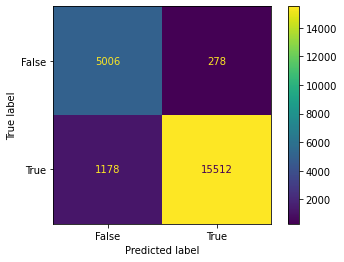

In [105]:

print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(lr.predict(testX), testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()



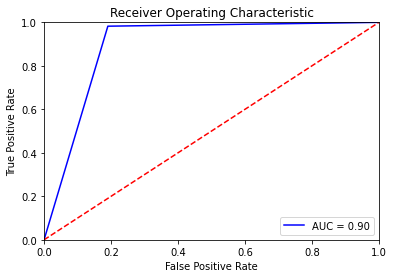

In [106]:
from sklearn.metrics import roc_curve, auc

# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,lr.predict(testX))

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

MultinomialNB

In [17]:
mnb = MultinomialNB()
mnb.fit(trainX,trainY)
mnb.score(testX,testY)

0.9559340854377238

In [19]:
import pickle
pickle.dump(mnb,open("model.pkl","wb"))

In [65]:
pickle.dump(cv, open('vectorizer.pkl', 'wb'))

In [62]:
import pickle
model=pickle.load(open("model.pkl", "rb"))

In [69]:
a="youtube.com"
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
data = tokenizer.tokenize(a) # doing with all rows
stemmer = SnowballStemmer("english") # choose a language
stemmed_data = [stemmer.stem(word) for word in data]
joined_data = ' '.join(stemmed_data)
vectorized_data = cv.transform([joined_data])
model.predict(vectorized_data)

array([1])


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.84      0.93      0.88      5585
        Good       0.97      0.94      0.96     16389

    accuracy                           0.94     21974
   macro avg       0.90      0.93      0.92     21974
weighted avg       0.94      0.94      0.94     21974


CONFUSION MATRIX


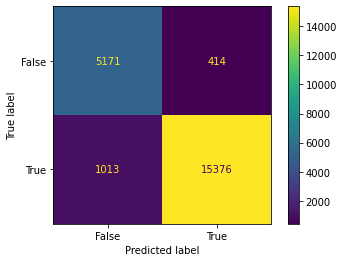

In [119]:

print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(mnb.predict(testX), testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

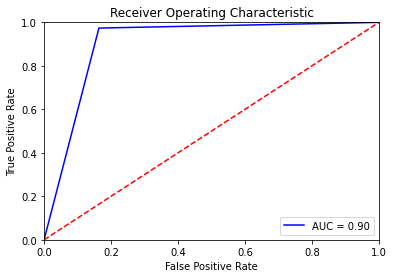

In [121]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,mnb.predict(testX))
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision TREE


In [122]:
dt = DecisionTreeClassifier()
dt.fit(trainX,trainY)
dt.score(testX,testY)

0.9201783926458542


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.80      0.91      0.85      5430
        Good       0.97      0.92      0.95     16544

    accuracy                           0.92     21974
   macro avg       0.88      0.92      0.90     21974
weighted avg       0.93      0.92      0.92     21974


CONFUSION MATRIX


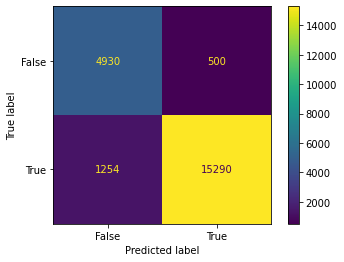

In [123]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(dt.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(dt.predict(testX), testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

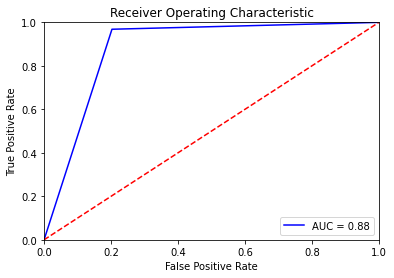

In [124]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,dt.predict(testX))
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [125]:
# Train a random forest model
rf = RandomForestClassifier()
rf.fit(trainX,trainY)
rf.score(testX,testY)

0.9331937744607263


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.81      0.95      0.87      5292
        Good       0.98      0.93      0.95     16682

    accuracy                           0.93     21974
   macro avg       0.90      0.94      0.91     21974
weighted avg       0.94      0.93      0.93     21974


CONFUSION MATRIX


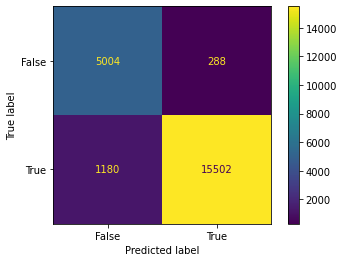

In [126]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(rf.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(rf.predict(testX), testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

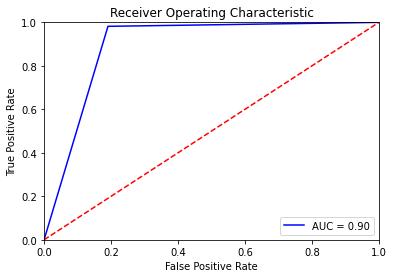

In [127]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,rf.predict(testX))
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SVM

In [128]:
# Train a support vector machine model
svc = SVC()
svc.fit(trainX,trainY)
svc.score(testX,testY)

0.9295986165468281


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.79      0.95      0.86      5179
        Good       0.98      0.92      0.95     16795

    accuracy                           0.93     21974
   macro avg       0.89      0.94      0.91     21974
weighted avg       0.94      0.93      0.93     21974


CONFUSION MATRIX


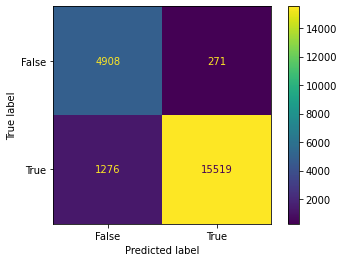

In [129]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(svc.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(svc.predict(testX), testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

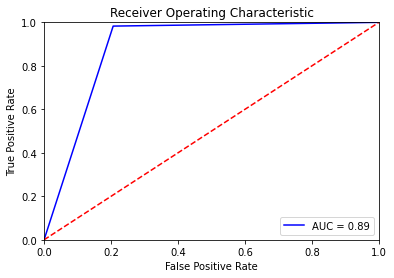

In [130]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,svc.predict(testX))
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBOOST


In [42]:
import xgboost as xgb
model = xgb.XGBRegressor(
    n_estimators=50,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [43]:
model.fit(trainX,trainY)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [44]:
model.score(testX,testY)

0.5042508040102345

In [62]:
predicted=model.predict(testX)
for x in range(len(predicted)):
        if(predicted[x]<0.5):
                predicted[x]=0;
        else:
               predicted[x]=1
        
print(predicted)

[0. 1. 1. ... 1. 1. 1.]



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.55      0.95      0.69      3632
        Good       0.99      0.84      0.91     18342

    accuracy                           0.86     21974
   macro avg       0.77      0.90      0.80     21974
weighted avg       0.92      0.86      0.87     21974


CONFUSION MATRIX


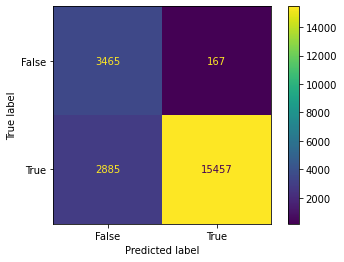

In [64]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(predicted, testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(predicted, testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


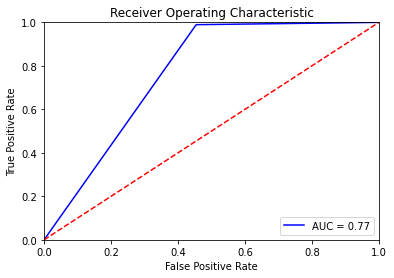

In [65]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,predicted)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

LIGHT GBM

In [67]:
import lightgbm as lgb
from lightgbm import LGBMClassifier


In [69]:
model = LGBMClassifier()
model.fit(trainX.astype('float32'),trainY.astype('float32')) 

LGBMClassifier()

In [70]:
# Predicting the Target variable
pred = model.predict(testX.astype('float32'))
print(pred)
accuracy = model.score(testX.astype('float32'),testY.astype('float32'))
print(accuracy)

[0. 0. 0. ... 1. 1. 1.]
0.9106671520888323



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.76      0.91      0.83      5295
        Good       0.97      0.91      0.94     16679

    accuracy                           0.91     21974
   macro avg       0.87      0.91      0.89     21974
weighted avg       0.92      0.91      0.91     21974


CONFUSION MATRIX


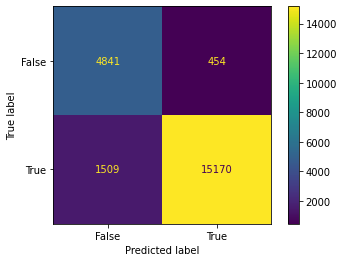

In [71]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(testX.astype('float32')), testY.astype('float32'),
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(model.predict(testX.astype('float32')), testY.astype('float32'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

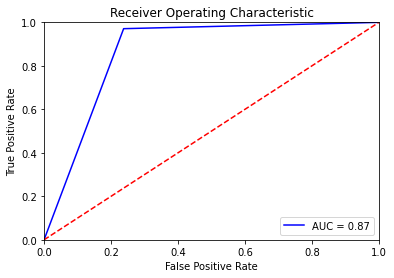

In [72]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY.astype('float32'),model.predict(testX.astype('float32')))
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CATBOOST

In [31]:
from catboost import CatBoostClassifier
# Initialize the CatBoost classifier
clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')
# Fit the classifier on the training data
clf.fit(trainX,trainY, verbose=False)
# Make predictions on the test set
y_pred = clf.predict(testX)
# Evaluate the accuracy of the predictions
accuracy = accuracy_score(testY, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.894193137344134



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.69      0.92      0.79      4663
        Good       0.98      0.89      0.93     17311

    accuracy                           0.89     21974
   macro avg       0.83      0.90      0.86     21974
weighted avg       0.92      0.89      0.90     21974


CONFUSION MATRIX


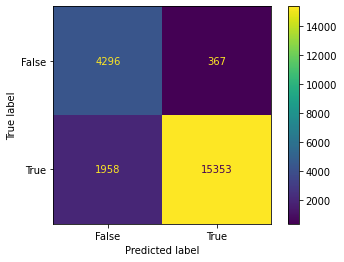

In [32]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred, testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(y_pred, testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


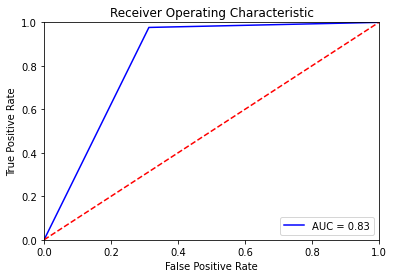

In [34]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,y_pred)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ADA Boost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoost classifier with decision trees as base estimators
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# Train the classifier
clf.fit(trainX, trainY)
# Make predictions on the test set
y_pred = clf.predict(testX)
# Evaluate the classifier
accuracy = accuracy_score(testY,y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8785837808318923



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.84      0.76      0.80      6928
        Good       0.89      0.93      0.91     15046

    accuracy                           0.88     21974
   macro avg       0.87      0.85      0.86     21974
weighted avg       0.88      0.88      0.88     21974


CONFUSION MATRIX


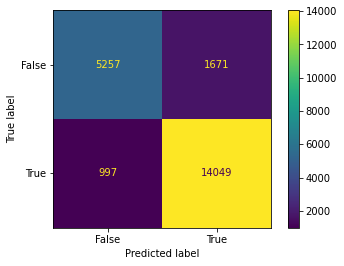

In [36]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred, testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(y_pred, testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


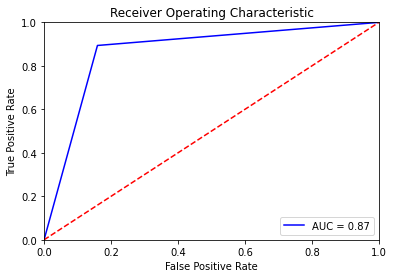

In [37]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,y_pred)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

OUR OWN CLASSIFICATION ALGORITHM BASED ON EXISITNG ALGORITMGS


In [27]:
class MyClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.dt_clf = DecisionTreeClassifier()
        self.svm_clf = SVC()

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # Train the decision tree classifier
        self.dt_clf.fit(X, y)

        # Generate new features using the decision tree classifier
        X_new = self.dt_clf.apply(X)
        X_new = np.reshape(X_new, (-1, 1))

        # Train the SVM on the new feature set
        self.svm_clf.fit(X_new, y)

        return self

In [ ]:
def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)

        # Generate new features using the decision tree classifier
        X_new = self.dt_clf.apply(X)
        X_new = np.reshape(X_new, (-1, 1))

        # Make predictions using the SVM
        y_pred = self.svm_clf.predict(X_new)

        return y_pred

In [24]:
clf = MyClassifier()
clf.fit(trainX.toarray(),trainY)
y_pred = clf.predict(testX)
accuracy = accuracy_score(testY, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8160098297988532



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.50      0.78      0.61      4019
        Good       0.94      0.83      0.88     17955

    accuracy                           0.82     21974
   macro avg       0.72      0.80      0.74     21974
weighted avg       0.86      0.82      0.83     21974


CONFUSION MATRIX


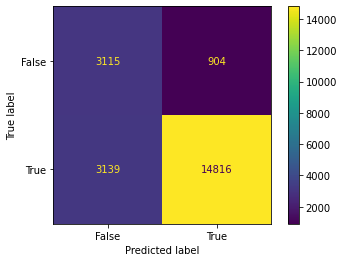

In [25]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred, testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(y_pred, testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


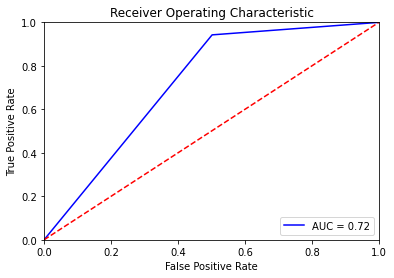

In [26]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,y_pred)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

By using the decision tree to generate new features that capture non-linear relationships between features and target variable, we can enhance the SVM's ability to accurately classify instances. The decision tree acts as a feature extractor that transforms the input data into a new feature space, which can then be used by the SVM to learn a decision boundary that separates the classes. This way, we can benefit from the strengths of both algorithms and improve the overall accuracy of the model.